In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Importing the data set
data = pd.read_csv('/content/facebook user data - facebook user data.csv')
## head of the data set (Fitst 5 rows of data set)
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [3]:
##Information about data set variables 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [4]:
## Finding the no. of Null values in each variable 
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [5]:
### Describing the data set 
data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [6]:
##To finding the max users in gender 
print(data['gender'].value_counts()['male'])
print(data['gender'].value_counts()['female'])


58574
40254


## It's clearly shows that most repeated gender in our data set is Male, so we can consider "male" is the mode 

In [7]:
##Replace the null values (NA) of gender column with its mode
data['gender'].fillna('male', inplace = True)

In [ ]:
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   2
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [8]:
##Replacing null values in "tunure" by its median
data['tenure'].fillna(value=data['tenure'].median(), inplace=True)

In [9]:
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

## Now all the missings values of gender and tunure are replaced. There is no missing values in oue data set

In [10]:
import seaborn as sb
## Correlation matrix
print(data.corr())

                         userid       age  ...  www_likes  www_likes_received
userid                 1.000000 -0.007265  ...   0.001828            0.001074
age                   -0.007265  1.000000  ...   0.015585           -0.018224
dob_day               -0.000839  0.035035  ...   0.009353            0.002460
dob_year               0.007265 -1.000000  ...  -0.015585            0.018224
dob_month              0.002924  0.025167  ...   0.012136            0.006003
tenure                -0.003449  0.462696  ...   0.070757            0.030553
friend_count          -0.001314 -0.027407  ...   0.229803            0.220727
friendships_initiated -0.001591 -0.058059  ...   0.214022            0.161439
likes                 -0.002875 -0.013009  ...   0.644960            0.295687
likes_received         0.001526 -0.022570  ...   0.255365            0.947990
mobile_likes          -0.004868 -0.026715  ...   0.187619            0.190173
mobile_likes_received  0.001753 -0.024248  ...   0.209997       

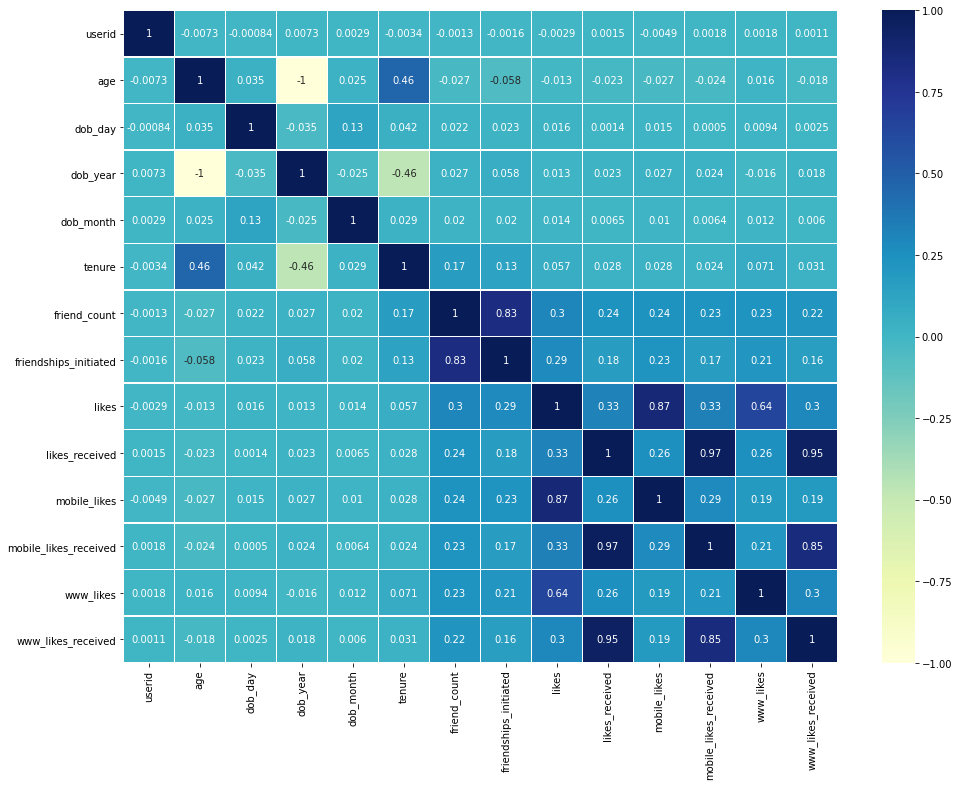

In [11]:
## Heatmap to represent correlation between variables 
plt.subplots(figsize=(16,12))
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True, linewidths=0.3,annot_kws={'size': 10})
plt.show()

In [ ]:
##Finding composition of male and female users
print((data['gender'].value_counts()['male'])/(len(data['gender']))*100)
print((data['gender'].value_counts()['female'])/(len(data['gender']))*100)

59.340626041635105
40.659373958364895


In [ ]:
##Finding which category of gender has more friends
a = data.groupby('gender')['friend_count'].sum()
print(a)

gender
female    9740258
male      9699059
Name: friend_count, dtype: int64


In [ ]:
##Finding which category of gender initiated more friendships
b = data.groupby('gender')['friendships_initiated'].sum()
print(b)

gender
female    4584894
male      6053223
Name: friendships_initiated, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


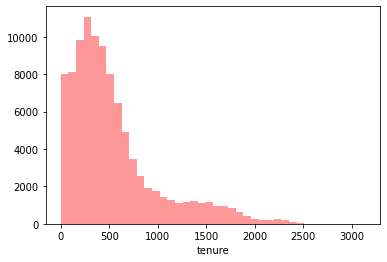

In [36]:
sb.distplot(data['tenure'], kde = False, color ='red', bins = 40)

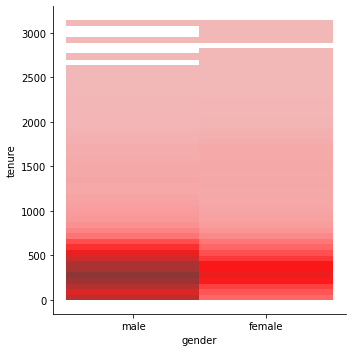

In [34]:
data=data[['gender', 'tenure']]
sb.displot(data, y="tenure",x="gender", color='red',bins=50)

In [17]:
## finding how many users have no friends
no_frndz_list=data[data['friend_count']==0]['userid'].count()
print(no_frndz_list)

1962


In [18]:
##Finding how many users did not like any posts
no_likes_users=data[data['likes']==0]['userid'].count()
print(no_likes_users)

22308


In [19]:
##Finding how many users did not receive any likes
no_likes_received_users=data[data['likes_received']==0]['userid'].count()
print(no_likes_received_users)

24428


In [21]:
##Finding the average number of posts liked by users (based on gender) through web vs. Mobile devices
data.groupby(by='gender')['mobile_likes', 'www_likes'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,mobile_likes,www_likes
gender,,
female,172.912928,87.138297
male,60.348176,24.490034


In [22]:
##Finding the average number of likes received by users (based on gender) through web vs. mobile devices?
data.groupby(by='gender')['mobile_likes_received', 'www_likes_received'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,mobile_likes_received,www_likes_received
gender,,
female,147.100884,104.334451
male,40.967199,27.210863
